In [1]:
%matplotlib inline
import pandas as pd
import nltk
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("data/data-filtered.csv")
df = pd.DataFrame(data=data)
df.columns

Index(['label', 'comment', 'author', 'subreddit', 'score', 'ups', 'downs',
       'date', 'created_utc', 'parent_comment'],
      dtype='object')

In [2]:
pos = df[df['label']==1]
pos['subreddit'].value_counts()[0:100]

AskReddit              23668
politics               22894
worldnews              16206
leagueoflegends        10799
news                   10140
pcmasterrace           10097
funny                   7482
todayilearned           7366
pics                    7359
AdviceAnimals           7210
GlobalOffensive         6909
nba                     6859
nfl                     6709
videos                  5762
gaming                  5473
atheism                 4539
TumblrInAction          4419
hockey                  4308
soccer                  4251
The_Donald              4217
creepyPMs               4156
WTF                     4142
CFB                     3403
technology              3284
movies                  2954
DotA2                   2811
india                   2656
australia               2601
DestinyTheGame          2487
europe                  2482
                       ...  
pokemon                  999
mildlyinteresting        962
hillaryclinton           957
TwoXChromosome

In [3]:
df['created_utc'] = pd.to_datetime(df['created_utc'], format='%Y-%m-%d %H:%M:%S')
df['hour_of_day'] = df['created_utc'].dt.hour
df

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,hour_of_day
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ...",23
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...,0
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.,21
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz,21
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...,17
5,0,"I don't pay attention to her, but as long as s...",only7inches,AskReddit,0,0,0,2016-09,2016-09-02 10:35:08,do you find ariana grande sexy ?,10
6,0,Trick or treating in general is just weird...,only7inches,AskReddit,1,-1,-1,2016-10,2016-10-23 21:43:03,What's your weird or unsettling Trick or Treat...,21
7,0,Blade Mastery+Masamune or GTFO!,P0k3rm4s7,FFBraveExvius,2,-1,-1,2016-10,2016-10-13 21:13:55,Probably Sephiroth. I refuse to taint his grea...,21
8,0,"You don't have to, you have a good build, buy ...",SoupToPots,pcmasterrace,1,-1,-1,2016-10,2016-10-27 19:11:06,What to upgrade? I have $500 to spend (mainly ...,19
9,0,I would love to see him at lolla.,chihawks,Lollapalooza,2,-1,-1,2016-11,2016-11-21 23:39:12,Probably count Kanye out Since the rest of his...,23


In [4]:
df=data.groupby(['hour_of_day', 'subreddit']).size().reset_index(name='count')
subreddits = pd.DataFrame(data['subreddit'].value_counts().reset_index())
subreddits.columns = ['subreddit', 'total_count']
df2 = pd.merge(df, subreddits, on='subreddit')
df2['relative_frequency'] = df2['count']/df2['total_count']

pop_500 = df['subreddit'].value_counts().reset_index()
pop_500 = pop_500.head(500)['index'].tolist()
sorted_df = df2.sort_values(by='total_count', ascending=False)
df_500 = sorted_df[sorted_df['subreddit'].isin(pop_500)]
popular2 = df_500.groupby(['hour_of_day']).apply(lambda x: x.loc[x['relative_frequency'].idxmax()]['subreddit'])
pop2 = pd.DataFrame(popular2.reset_index())
pop2.columns = ['HOD', 'subreddit']

table2 = df_500[df_500['subreddit'].isin(pop2['subreddit'].tolist())]
matrix2 = pd.crosstab(table2['subreddit'], table2['hour_of_day'], values=table2['relative_frequency'], aggfunc='sum')
matrix2 = matrix2.replace(np.nan,0)
matrix2 = matrix2.reindex(pop2['subreddit'].tolist())
matrix2

hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
subreddit,,,,,,,,,,,,,,,,,,,,,
Gamingcirclejerk,0.121951,0.024390,0.056911,0.024390,0.040650,0.016260,0.024390,0.016260,0.016260,0.048780,...,0.056911,0.024390,0.065041,0.040650,0.056911,0.048780,0.065041,0.040650,0.040650,0.073171
BigBrother,0.098864,0.115564,0.074148,0.062792,0.076152,0.068804,0.053440,0.038744,0.016032,0.014028,...,0.018036,0.012692,0.025384,0.034736,0.032732,0.038076,0.048096,0.048764,0.042084,0.044088
BravoRealHousewives,0.056604,0.113208,0.125786,0.037736,0.028302,0.034591,0.015723,0.012579,0.006289,0.006289,...,0.047170,0.053459,0.044025,0.044025,0.050314,0.050314,0.040881,0.040881,0.040881,0.056604
warriors,0.040678,0.098305,0.091525,0.125424,0.098305,0.064407,0.033898,0.030508,0.016949,0.010169,...,0.013559,0.020339,0.044068,0.027119,0.044068,0.067797,0.027119,0.054237,0.020339,0.037288
warriors,0.040678,0.098305,0.091525,0.125424,0.098305,0.064407,0.033898,0.030508,0.016949,0.010169,...,0.013559,0.020339,0.044068,0.027119,0.044068,0.067797,0.027119,0.054237,0.020339,0.037288
AFL,0.050526,0.048421,0.075789,0.067368,0.069474,0.080000,0.058947,0.071579,0.058947,0.058947,...,0.033684,0.010526,0.016842,0.002105,0.004211,0.004211,0.010526,0.010526,0.029474,0.018947
malaysia,0.036697,0.051988,0.067278,0.058104,0.061162,0.051988,0.088685,0.024465,0.076453,0.055046,...,0.036697,0.024465,0.051988,0.024465,0.015291,0.012232,0.003058,0.009174,0.015291,0.033639
AFL,0.050526,0.048421,0.075789,0.067368,0.069474,0.080000,0.058947,0.071579,0.058947,0.058947,...,0.033684,0.010526,0.016842,0.002105,0.004211,0.004211,0.010526,0.010526,0.029474,0.018947
korea,0.051282,0.068376,0.068376,0.025641,0.042735,0.042735,0.017094,0.051282,0.085470,0.068376,...,0.059829,0.059829,0.042735,0.025641,0.017094,0.034188,0.008547,0.025641,0.042735,0.051282


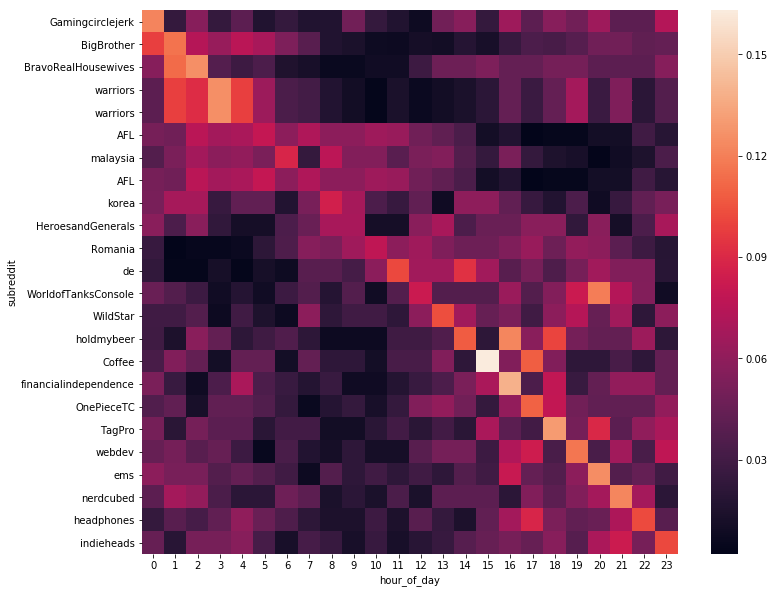

In [5]:
plt.figure(figsize=(12,10))
sns.heatmap(matrix2)

   hour_of_day  label  count  total_count  relative
0            0      1  22137        43493  0.508978
1            0      0  21356        43493  0.491022
2            1      1  21338        42426  0.502946
3            1      0  21088        42426  0.497054
4            2      1  21147        42084  0.502495


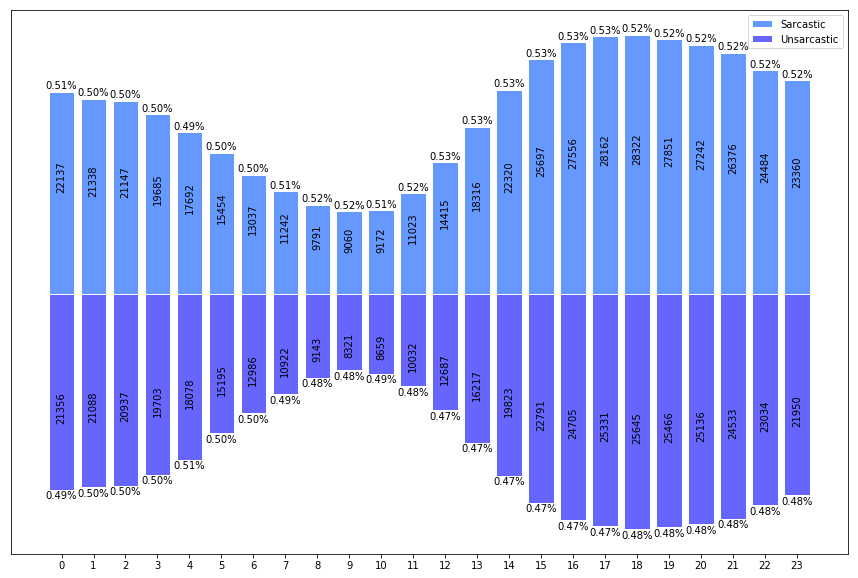

In [19]:
#Hourly distribution of the data

plt.figure(figsize=(15,10))

df = pd.DataFrame(data=data)
df['hour_of_day'] = df['created_utc'].dt.hour
df['year'] = df['created_utc'].dt.year
ordered = df.groupby(['hour_of_day']).apply(lambda x: x['label'].value_counts())
new = ordered.reset_index()
new.columns = ['hour_of_day', 'label', 'count']
allC = new.groupby(['hour_of_day']).sum().reset_index()

final = pd.merge(new, allC, on='hour_of_day')
final = final.drop(['label_y'],axis=1)
final.columns = ['hour_of_day', 'label', 'count', 'total_count']
final['relative'] = final['count']/final['total_count']
print(final.head())
pos = final[final['label']==1]
neg = final[final['label']==0]
plt.bar(pos['hour_of_day'], pos['count'], facecolor='#6699ff', edgecolor='white', label='Sarcastic')
plt.bar(neg['hour_of_day'], -neg['count'], facecolor='#6666ff', edgecolor='white', label='Unsarcastic')

for x,y,z in zip(pos['hour_of_day'],pos['count'],pos['relative']):
    plt.text(x, y+100, '%.2f' % z+'%', ha='center', va= 'bottom')
    plt.text(x, y/2, y, ha='center', va='bottom', rotation=90)
    
for x,y,z in zip(neg['hour_of_day'],neg['count'],neg['relative']):
    plt.text(x, -y-100, '%.2f' % z+'%', ha='center', va= 'top')
    plt.text(x, -y/2, y, ha='center', va='top', rotation=90)
    
plt.xticks(np.arange(0,24,1))
plt.yticks([])
plt.legend(loc='best')